## Project 5: Time series analysis

In [416]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


mpl.rcParams['axes.linewidth'] = 2 #set the value globally
rc('font',**{'family':'serif','serif':['Computer Modern']})
rc('text', usetex=False)
mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20) 
mpl.rcParams["xtick.minor.visible"] =  True
mpl.rcParams["ytick.minor.visible"] =  True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5

In [417]:
df = pd.read_csv('ECA_blended_custom/TG_STAID002759.txt',sep=',',skiprows=18,parse_dates=True,index_col='    DATE')

In [418]:
# df=df[df[' Q_TG']==0]

In [419]:
df.columns

Index([' SOUID', '   TG', ' Q_TG'], dtype='object')

In [420]:
df=df.drop(columns=[' SOUID',' Q_TG'])

In [421]:
df.columns

Index(['   TG'], dtype='object')

In [422]:
df.isnull().values.any()

False

In [423]:
df['   TG'].replace(-9999, pd.NA , inplace=True)

In [424]:
df

,TG
DATE,
1876-01-01,22
1876-01-02,25
1876-01-03,3
1876-01-04,-58
1876-01-05,-98
...,...
2022-03-27,97
2022-03-28,108
2022-03-29,80


In [425]:
#Fix the temperature
df['temp']=df['   TG']*0.1

In [426]:
df

,TG,temp
DATE,,
1876-01-01,22,2.2
1876-01-02,25,2.5
1876-01-03,3,0.3
1876-01-04,-58,-5.8
1876-01-05,-98,-9.8
...,...,...
2022-03-27,97,9.7
2022-03-28,108,10.8
2022-03-29,80,8.0


In [427]:
# Get year/month/day 
# df['YEAR']=df['    DATE'].astype(str).str[:4]
# df['MONTH']=df['    DATE'].astype(str).str[4:6]
# df['DAY']=df['    DATE'].astype(str).str[6:8]
# df['YEAR']=df['YEAR'].astype(int)
# df['MONTH']=df['MONTH'].astype(int)
# df['DAY']=df['DAY'].astype(int)

In [428]:
df['month']=df.index.month_name()
df['year']=df.index.year
df['day']=df.index.day_name()
df['quarter']=df.index.quarter
df['dayofyear']=df.index.day_of_year
df['weekofyear']=df.index.weekofyear


C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [429]:
df

,TG,temp,month,year,day,quarter,dayofyear,weekofyear
DATE,,,,,,,,
1876-01-01,22,2.2,January,1876,Saturday,1,1,52
1876-01-02,25,2.5,January,1876,Sunday,1,2,52
1876-01-03,3,0.3,January,1876,Monday,1,3,1
1876-01-04,-58,-5.8,January,1876,Tuesday,1,4,1
1876-01-05,-98,-9.8,January,1876,Wednesday,1,5,1
...,...,...,...,...,...,...,...,...
2022-03-27,97,9.7,March,2022,Sunday,1,86,12
2022-03-28,108,10.8,March,2022,Monday,1,87,13
2022-03-29,80,8.0,March,2022,Tuesday,1,88,13


<AxesSubplot:xlabel='year', ylabel='temp'>

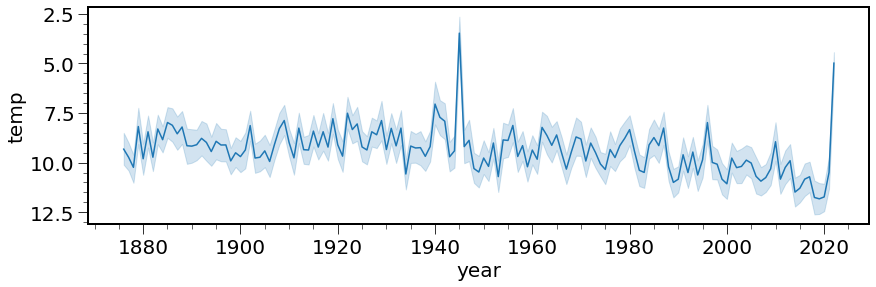

In [430]:
#create chart in each subplot
fig, axes = plt.subplots(1)
fig.set_size_inches(14, 4)
sns.lineplot(data=df, x='year', y='temp')
# sns.lineplot(data=df, x='year', y='temp')


In [431]:
df

,TG,temp,month,year,day,quarter,dayofyear,weekofyear
DATE,,,,,,,,
1876-01-01,22,2.2,January,1876,Saturday,1,1,52
1876-01-02,25,2.5,January,1876,Sunday,1,2,52
1876-01-03,3,0.3,January,1876,Monday,1,3,1
1876-01-04,-58,-5.8,January,1876,Tuesday,1,4,1
1876-01-05,-98,-9.8,January,1876,Wednesday,1,5,1
...,...,...,...,...,...,...,...,...
2022-03-27,97,9.7,March,2022,Sunday,1,86,12
2022-03-28,108,10.8,March,2022,Monday,1,87,13
2022-03-29,80,8.0,March,2022,Tuesday,1,88,13


In [432]:
# df['temp'].replace(-999.9, pd.NA , inplace=True)
# df['temp']=df['temp'].replace('-999.9',np.nan)
# df.loc[df['   TG'] == '-9999.0'] = np.NaN

In [433]:
#Last Observation Carried Forward (LOCF)
df['temp_locf']= df['temp'].fillna(method ='bfill')

In [434]:
#Next Observation Carried Backward (NOCB)
df['temp_nocb']= df['temp'].fillna(method ='ffill')


In [435]:
#Interpolation
df['temp_interp']= df['temp'].interpolate(method='time')

<AxesSubplot:xlabel='year', ylabel='temp_interp'>

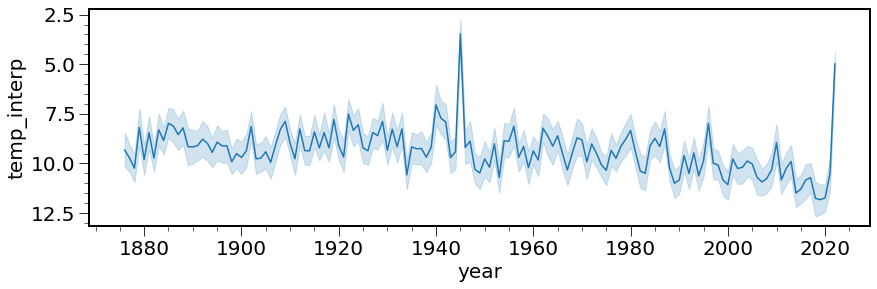

In [436]:
fig, axes = plt.subplots(1)
fig.set_size_inches(14, 4)
sns.lineplot(data=df, x='year', y='temp_interp')

<AxesSubplot:xlabel='year', ylabel='temp_nocb'>

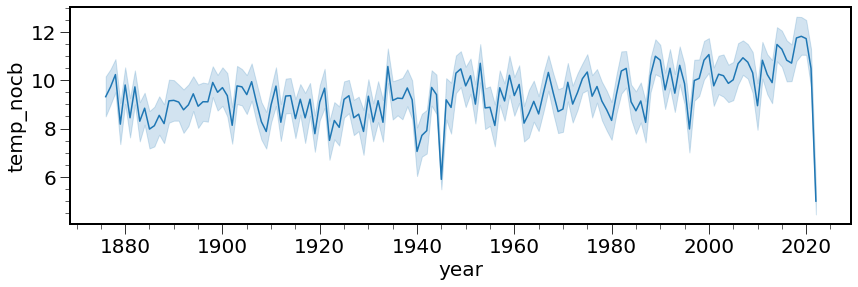

In [437]:
fig, axes = plt.subplots(1)
fig.set_size_inches(14, 4)
sns.lineplot(data=df, x='year', y='temp_nocb')

<AxesSubplot:xlabel='year', ylabel='temp_locf'>

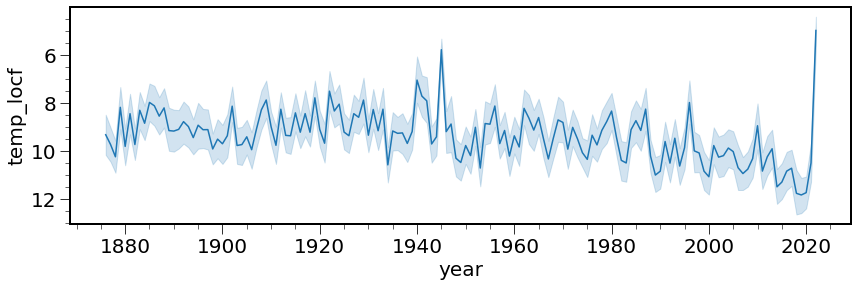

In [438]:
#Last Observation Carried Forward (LOCF)
fig, axes = plt.subplots(1)
fig.set_size_inches(14, 4)
sns.lineplot(data=df, x='year', y='temp_locf')

In [439]:
df['timestep'] = list(range(len(df)))

In [440]:
# Run a Linear Regression
m = LinearRegression()
X = df[['timestep']]
y = df['temp_nocb']
m.fit(X, y)

LinearRegression()

In [441]:
df['trend'] = m.predict(X)
df.head()

,TG,temp,month,year,day,quarter,dayofyear,weekofyear,temp_locf,temp_nocb,temp_interp,timestep,trend
DATE,,,,,,,,,,,,,
1876-01-01,22,2.2,January,1876,Saturday,1,1,52,2.2,2.2,2.2,0,8.512586
1876-01-02,25,2.5,January,1876,Sunday,1,2,52,2.5,2.5,2.5,1,8.512619
1876-01-03,3,0.3,January,1876,Monday,1,3,1,0.3,0.3,0.3,2,8.512651
1876-01-04,-58,-5.8,January,1876,Tuesday,1,4,1,-5.8,-5.8,-5.8,3,8.512684
1876-01-05,-98,-9.8,January,1876,Wednesday,1,5,1,-9.8,-9.8,-9.8,4,8.512717


<AxesSubplot:xlabel='year', ylabel='temp_nocb'>

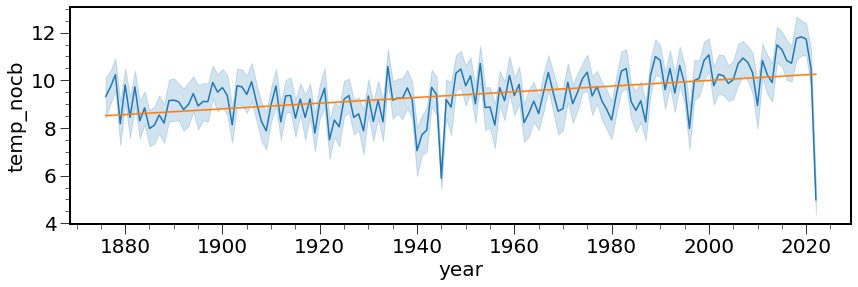

In [442]:
fig, axes = plt.subplots(1)
fig.set_size_inches(14, 4)
sns.lineplot(data=df, x='year', y='temp_nocb')
sns.lineplot(data=df, x='year', y='trend')


In [443]:
pd.get_dummies(df.index.month, prefix='month').set_index(df.index)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
1876-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,0,0,1,0,0,0,0,0,0,0,0,0
2022-03-28,0,0,1,0,0,0,0,0,0,0,0,0
2022-03-29,0,0,1,0,0,0,0,0,0,0,0,0


In [444]:
seasonal_dummies = pd.get_dummies(df.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df.index)
# sklearn.preprocessing.OneHotEncoder

df = df.join(seasonal_dummies)

In [445]:
df.columns

Index(['   TG', 'temp', 'month', 'year', 'day', 'quarter', 'dayofyear',
       'weekofyear', 'temp_locf', 'temp_nocb', 'temp_interp', 'timestep',
       'trend', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [446]:
X = df.drop(columns=['   TG', 'temp', 'month', 'year', 'day', 'quarter', 'dayofyear',
       'weekofyear', 'temp_locf', 'temp_nocb', 'temp_interp', 'trend'])

In [447]:
X

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
1876-01-01,0,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,2,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,3,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,53411,0,1,0,0,0,0,0,0,0,0,0
2022-03-28,53412,0,1,0,0,0,0,0,0,0,0,0
2022-03-29,53413,0,1,0,0,0,0,0,0,0,0,0


In [448]:
m.fit(X, y)

LinearRegression()

In [449]:
df['trend_seasonal'] = m.predict(X)

<AxesSubplot:xlabel='year', ylabel='temp_nocb'>

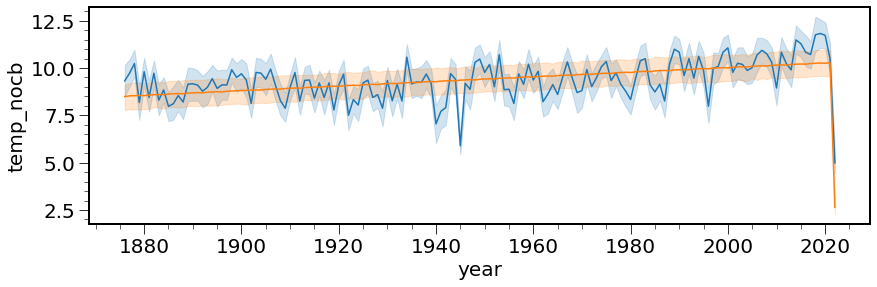

In [450]:
fig, axes = plt.subplots(1)
fig.set_size_inches(14, 4)
sns.lineplot(data=df, x='year', y='temp_nocb')
sns.lineplot(data=df, x='year', y='trend_seasonal')

(1000.0, 3000.0)

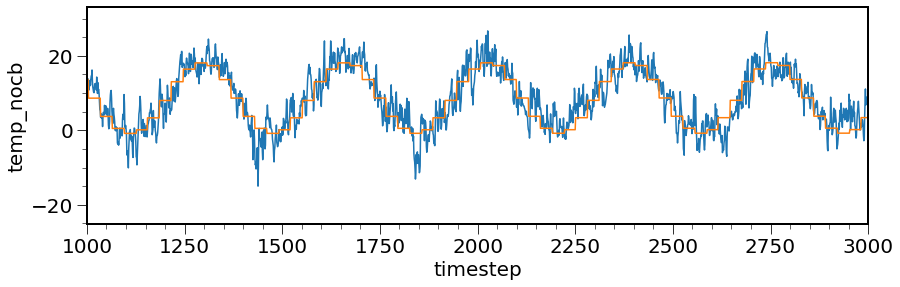

In [451]:
fig, axes = plt.subplots(1)
fig.set_size_inches(14, 4)
sns.lineplot(data=df, x='timestep', y='temp_nocb')
sns.lineplot(data=df, x='timestep', y='trend_seasonal')
plt.xlim(1000, 3000)

(1000.0, 3000.0)

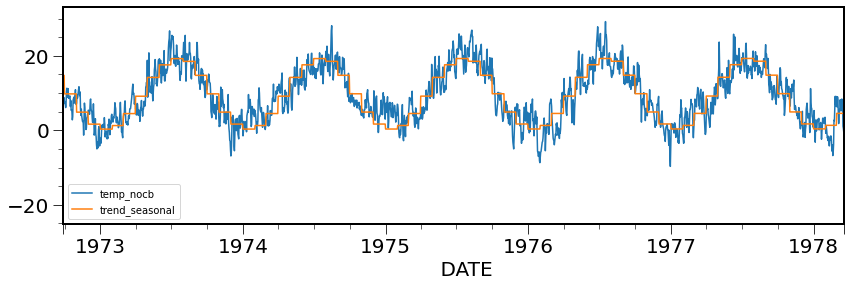

In [458]:
# fig, axes = plt.subplots(1)
# fig.set_size_inches(14, 4)
df[['temp_nocb', 'trend_seasonal']].plot(figsize=(14, 4))
plt.xlim(1000, 3000)

<AxesSubplot:xlabel='timestep', ylabel='temp_nocb'>

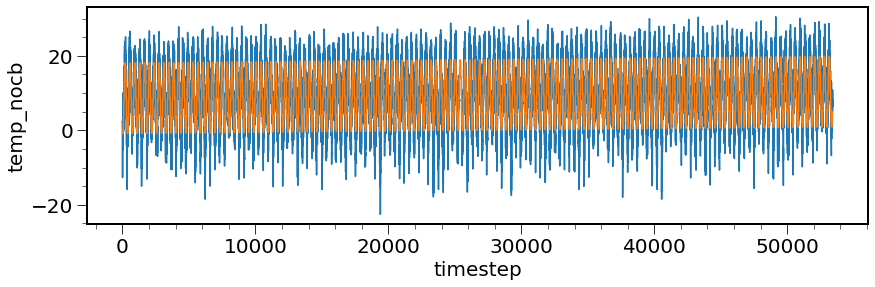

In [453]:
fig, axes = plt.subplots(1)
fig.set_size_inches(14, 4)
sns.lineplot(data=df, x='timestep', y='temp_nocb')
sns.lineplot(data=df, x='timestep', y='trend_seasonal')

<AxesSubplot:xlabel='    DATE'>

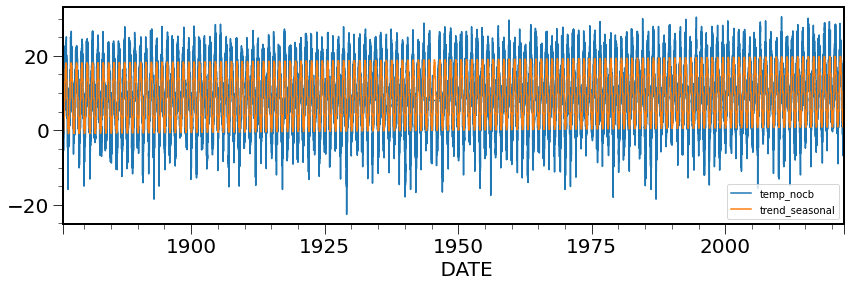

In [459]:
df[['temp_nocb', 'trend_seasonal']].plot(figsize=(14, 4))
# plt.xlim(1000, 3000)

In [454]:
df['remainder'] = df['temp_nocb'] - df['trend_seasonal']

<AxesSubplot:xlabel='    DATE'>

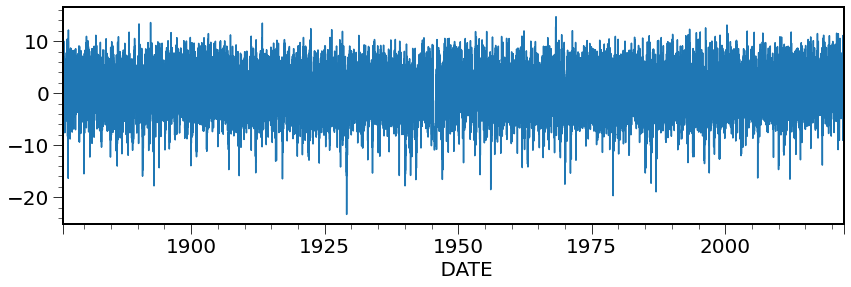

In [461]:
df['remainder'].plot(figsize=(14, 4))

(1000.0, 3000.0)

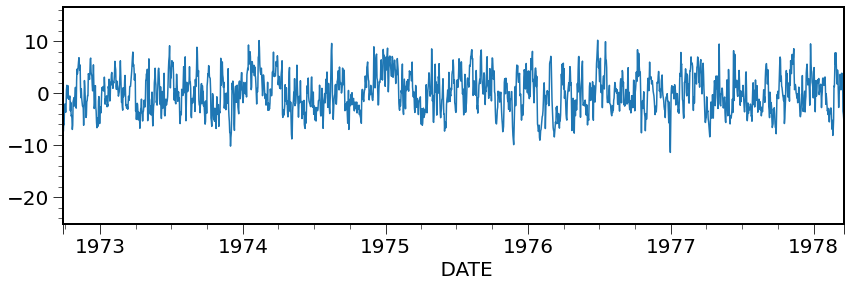

In [460]:
df['remainder'].plot(figsize=(14, 4))
plt.xlim(1000, 3000)

In [456]:
# ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')

# # 2. fit with the training data (some columns of it)
# ohc.fit(df[['month']])

# # 3. transform the training data
# onehot= ohc.transform(df['month'])
# cols_ohc = pd.DataFrame(onehot, columns=ohc.get_feature_names_out())
# cols_ohc
